In [1]:
import numpy as np;
import networkx as nx;
import matplotlib.pyplot as plt;
import random
import copy
import math
from copy import copy, deepcopy
from itertools import product
from coloring_functions import *
from network_class import *
from MH_Algo import *

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
%run network_class.py
%run coloring_functions.py
%run MH_Algo.py

In [3]:
def plot(welfare_collection, temp_types, name, x_label = 'Iteration', y_label = 'Welfare', save_path = None):
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111)
    highest = []
    last_index = len(welfare_collection[0]) - 1
    for k in range(len(welfare_collection)):
        welfare_record = welfare_collection[k]
        highest.append(welfare_record[-1])
        ax.plot(range(len(welfare_record)), welfare_record[:], label=temp_types[k])
        last_value = welfare_record[-1]

        # Plot the red circle
        ax.plot(last_index, last_value, 'ro', markersize=8)  # 'ro' means red circle marker

    best_welfare = max(highest)

    # Annotate the value of welfare_record[-1] with a text label
    ax.annotate(f"{best_welfare:.2f}", xy=(last_index, best_welfare),
                xytext=(-10, 10), textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.7))
    
    ax.legend()
    ax.grid(True) 
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(name)

    if save_path:
        plt.savefig(save_path)

    plt.show()
    


### WO_Async: different network size

In [51]:
mynetwork_list = []
network_size = [10, 20, 30, 40, 50]
for size in network_size:
    mynetwork_list.append(network(size, prob = 0.5, seed = 41))

True
84.12023598483736
True
83.57560301120941
True
81.426579557138


/Users/zeyichen/Desktop/URECA Yr2/Code/New code/MH_Algo.py:48: RuntimeWarning: overflow encountered in exp
  p = min(1, np.exp(delta_U / temp))


True
83.88377450346657


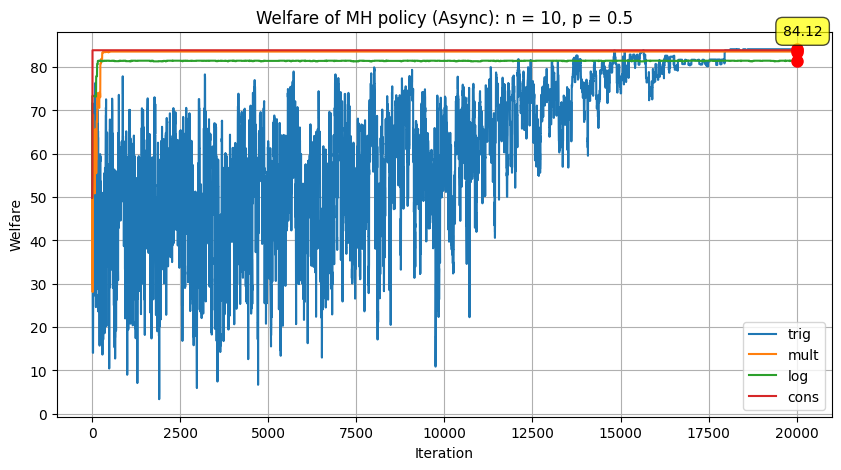

True
89.4537105847625
True
87.18318148318295
True
90.77446719365999
True
87.00926242356351


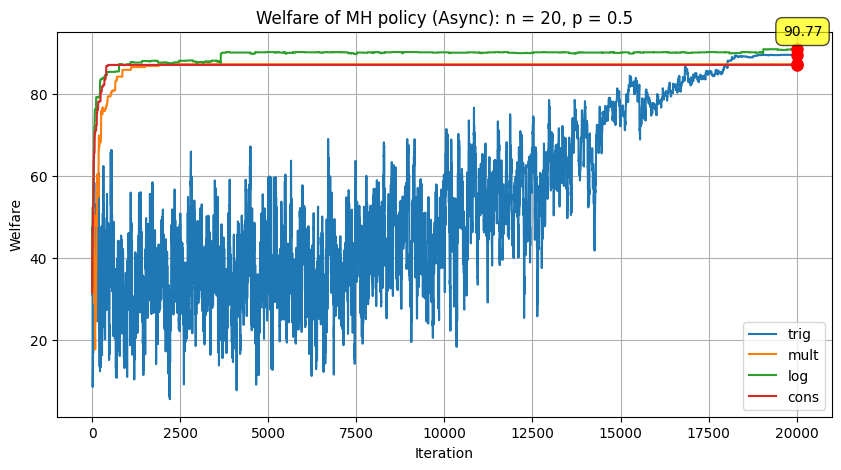

True
94.4881591903312
True
94.43586659410154
True
94.46588714239788
True
94.21663164665527


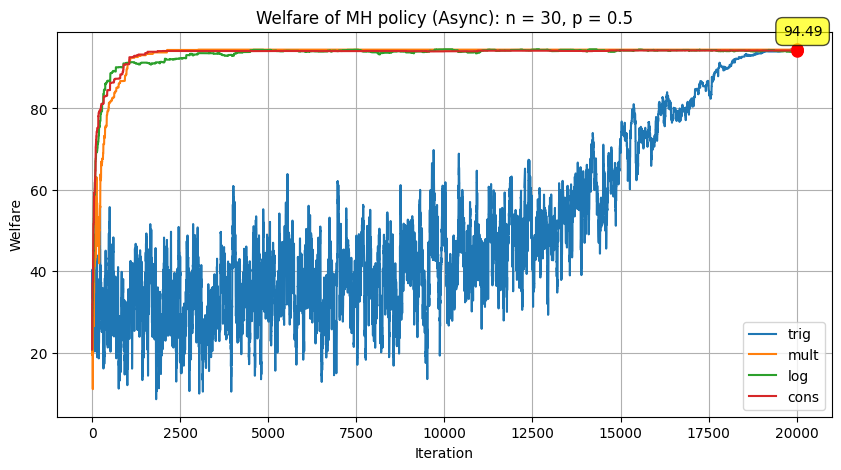

True
92.99145048250625
True
93.23193321617896
True
93.34523562611587
True
92.51560425776717


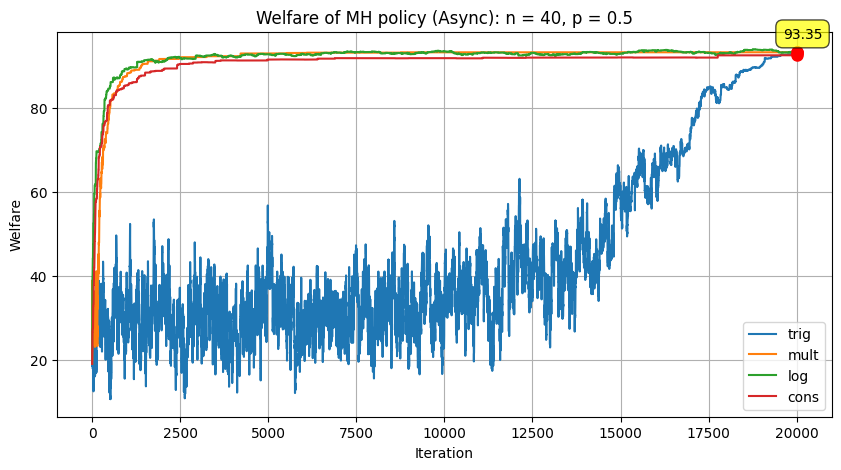

True
93.03475845425274
True
95.05476944236013
True
94.15641520549426
True
95.65239005341546


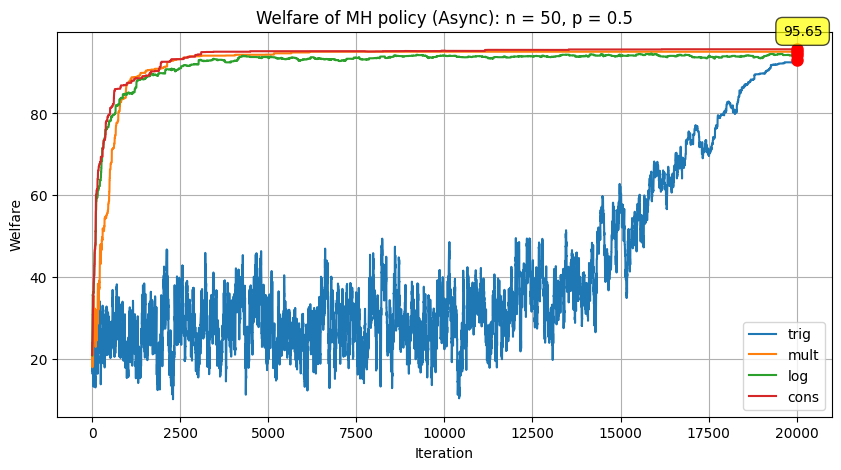

In [52]:
for mynetwork in mynetwork_list:
    n_color = mynetwork.n_color()
    mycolor = range(n_color)
    utility = utility_generator(mynetwork, n_color, seed = 41)
    # print(utility)
    weight = weight_generator(mynetwork.G.nodes(), seed = 41)
    # print(weight)
    c_WO2 = [0] * 4
    welfare_record = [0] * 4
    optimal_welfare = []
    optimal_coloring = []
    for i in range(4):
        c_WO2[i], welfare_record[i] = MH_policy_async(mynetwork, mycolor, weight, utility, T = 20000, temp_type = i)
        # print(c_WO2[i])
        print(isproper(mynetwork, c_WO2[i]))
        print(welfare_record[i][-1])
        optimal_welfare.append(welfare_record[i][-1])
        optimal_coloring.append(c_WO2[i])

    file_path_oc = f'/Users/zeyichen/Desktop/URECA Yr2/new/mypaper/figures/WO_Async_size/WO_async_oc_{mynetwork.n}.txt'
    with open(file_path_oc, 'w') as file:
        for sublist in optimal_coloring:
            sublist_str = '\t'.join(str(item) for item in sublist)
            file.write(sublist_str + '\n')

    
    file_path_ow = f'/Users/zeyichen/Desktop/URECA Yr2/new/mypaper/figures/WO_Async_size/WO_async_ow_{mynetwork.n}.txt'
    with open(file_path_ow, 'w') as file:
        for item in optimal_welfare:
            file.write(str(item) + '\n')

    save_folder = "/Users/zeyichen/Desktop/URECA Yr2/new/mypaper/figures/WO_Async_size"
    plot(welfare_record, ['trig', 'mult', 'log', 'cons'], f'Welfare of MH policy (Async): n = {mynetwork.n}, p = 0.5', save_path=f"{save_folder}/WO_async_{mynetwork.n}.png")


### WO_Async: different network degree

In [78]:
mynetwork_list = []
network_prob = [0.25, 0.5, 0.75]
for prob in network_prob:
    mynetwork_list.append(network(n = 20, prob = prob, seed = 41))

True
89.92905796289848
True
89.74492654085479
True
89.55737303971456
True
88.71099819218702


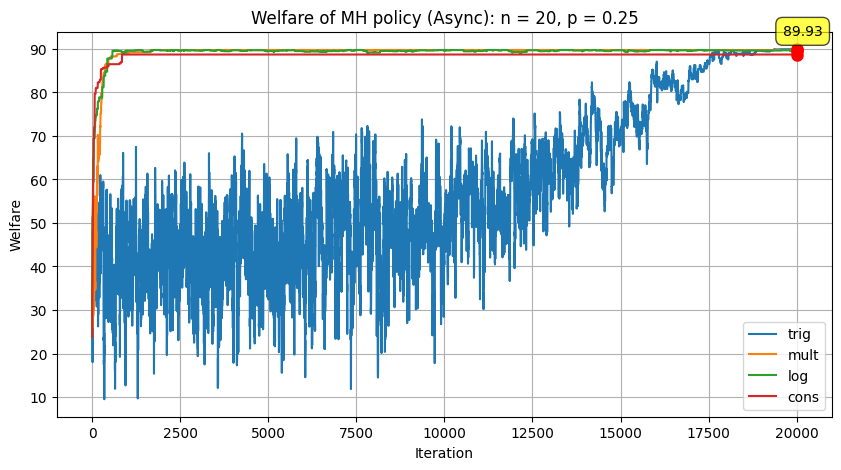

True
89.4537105847625
True
87.18318148318295
True
90.77446719365999
True
87.00926242356351


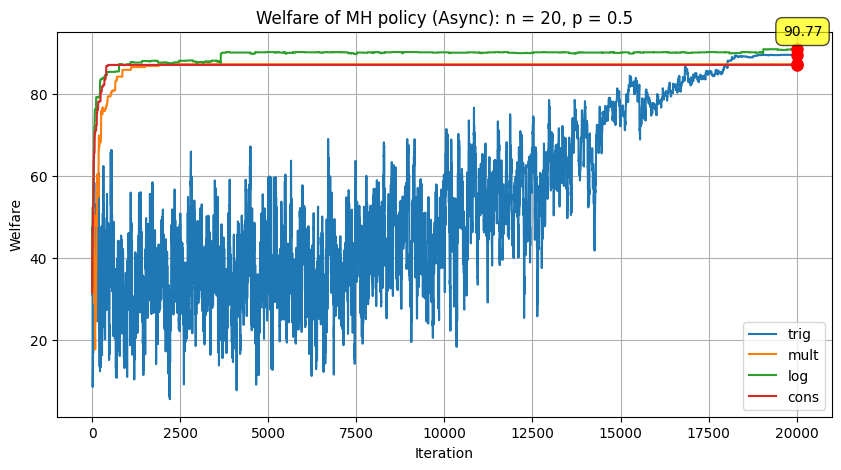

True
92.52562661605906
True
89.90806077817777
True
91.95423808774272
True
90.93554021043704


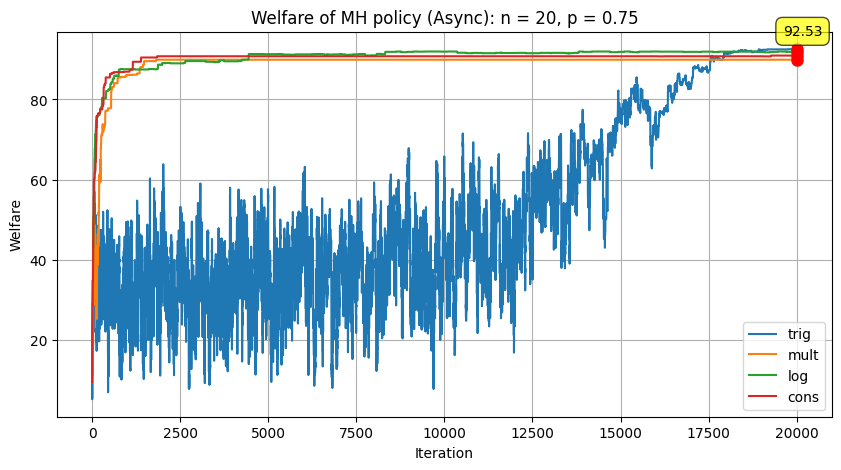

In [79]:
for mynetwork in mynetwork_list:
    n_color = mynetwork.n_color()
    mycolor = range(n_color)
    utility = utility_generator(mynetwork, n_color, seed = 41)
    # print(utility)
    weight = weight_generator(mynetwork.G.nodes(), seed = 41)
    # print(weight)
    c_WO2 = [0] * 4
    welfare_record = [0] * 4
    optimal_welfare = []
    optimal_coloring = []
    for i in range(4):
        c_WO2[i], welfare_record[i] = MH_policy_async(mynetwork, mycolor, weight, utility, T = 20000, temp_type = i)
        # print(c_WO2[i])
        print(isproper(mynetwork, c_WO2[i]))
        print(welfare_record[i][-1])
        optimal_welfare.append(welfare_record[i][-1])
        optimal_coloring.append(c_WO2[i])
    file_path_oc = f'/Users/zeyichen/Desktop/URECA Yr2/new/mypaper/figures/WO_Async_degree/WO_async_oc_{mynetwork.prob}.txt'
    with open(file_path_oc, 'w') as file:
        for sublist in optimal_coloring:
            sublist_str = '\t'.join(str(item) for item in sublist)
            file.write(sublist_str + '\n')

    
    file_path_ow = f'/Users/zeyichen/Desktop/URECA Yr2/new/mypaper/figures/WO_Async_degree/WO_async_ow_{mynetwork.prob}.txt'
    with open(file_path_ow, 'w') as file:
        for item in optimal_welfare:
            file.write(str(item) + '\n')
    
    save_folder = "/Users/zeyichen/Desktop/URECA Yr2/new/mypaper/figures/WO_Async_degree"
    plot(welfare_record, ['trig', 'mult', 'log', 'cons'], f'Welfare of MH policy (Async): n = 20, p = {mynetwork.prob}', save_path=f"{save_folder}/WO_async_{mynetwork.prob}.png")


### WO_Sync: different omega

In [80]:
mynetwork = network(n = 20, prob = 0.5, seed = 41)
omega_list = [0.25, 0.5, 0.75, 1]

True
90.14813113877342
True
88.82085290127904
True
87.3907048299912
True
85.7268063332042


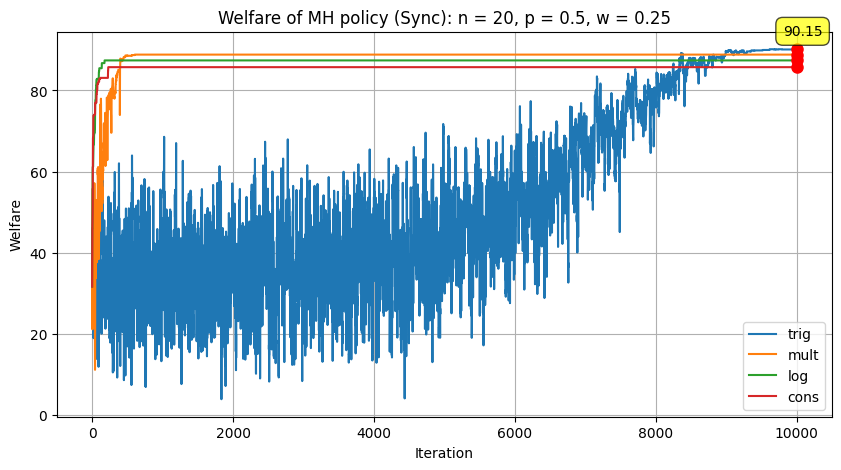

True
90.8304933276752
True
90.20639986615741
True
86.92758209504039
True
87.7013537651646


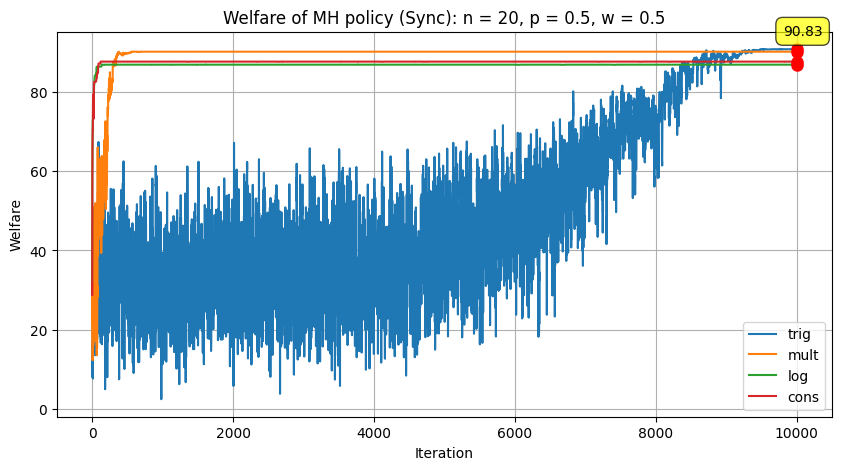

True
90.61536668966754
True
90.44071620976369
True
87.14882751399868
True
88.82085290127904


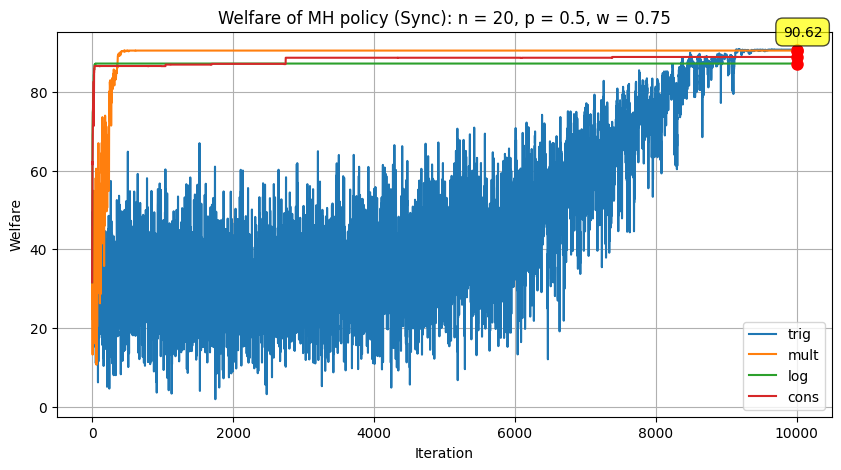

True
90.44071620976369
True
90.63450905368032
True
89.19092224788982
True
88.50973890907308


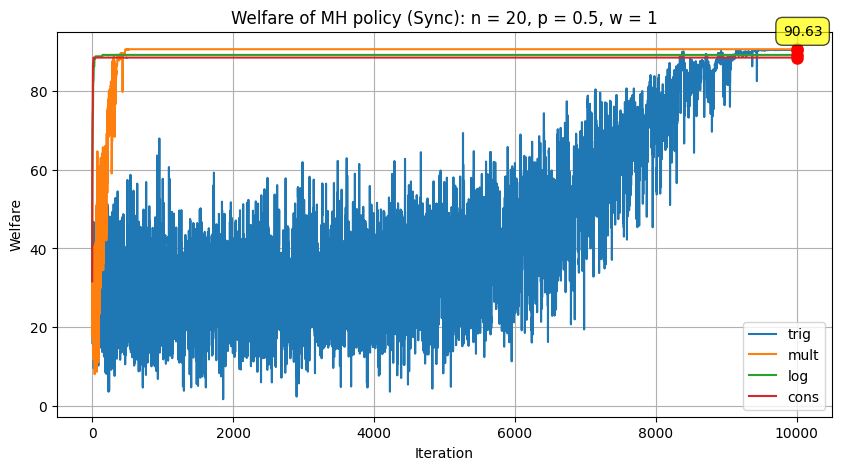

In [81]:
for omega in omega_list:
    n_color = mynetwork.n_color()
    mycolor = range(n_color)
    utility = utility_generator(mynetwork, n_color, seed = 41)
    # print(utility)
    weight = weight_generator(mynetwork.G.nodes(), seed = 41)
    # print(weight)
    c_WO2 = [0] * 4
    welfare_record = [0] * 4
    optimal_welfare = []
    optimal_coloring = []
    for i in range(4):
        c_WO2[i], welfare_record[i] = MH_policy_sync(mynetwork, mycolor, weight, utility, T = 10000, temp_type = i, omega = omega)
        # print(c_WO2[i])
        print(isproper(mynetwork, c_WO2[i]))
        print(welfare_record[i][-1])
        optimal_welfare.append(welfare_record[i][-1])
        optimal_coloring.append(c_WO2[i])
    
    file_path_oc = f'/Users/zeyichen/Desktop/URECA Yr2/new/mypaper/figures/WO_Sync_omega/WO_sync_oc_{omega}.txt'
    with open(file_path_oc, 'w') as file:
        for sublist in optimal_coloring:
            sublist_str = '\t'.join(str(item) for item in sublist)
            file.write(sublist_str + '\n')
    
    file_path_ow = f'/Users/zeyichen/Desktop/URECA Yr2/new/mypaper/figures/WO_Sync_omega/WO_sync_ow_{omega}.txt'
    with open(file_path_ow, 'w') as file:
        for item in optimal_welfare:
            file.write(str(item) + '\n')

    save_folder = "/Users/zeyichen/Desktop/URECA Yr2/new/mypaper/figures/WO_Sync_omega"
    plot(welfare_record, ['trig', 'mult', 'log', 'cons'], f'Welfare of MH policy (Sync): n = 20, p = 0.5, w = {omega}', save_path=f"{save_folder}/WO_sync_w_{omega}.png")


### WO_Sync: different network degree

In [82]:
mynetwork_list = []
network_prob = [0.25, 0.5, 0.75]
for prob in network_prob:
    mynetwork_list.append(network(n = 20, prob = prob, seed = 41))

True
89.92905796289848
True
89.45708292947478
True
88.85763458161433
True
89.34512551424255


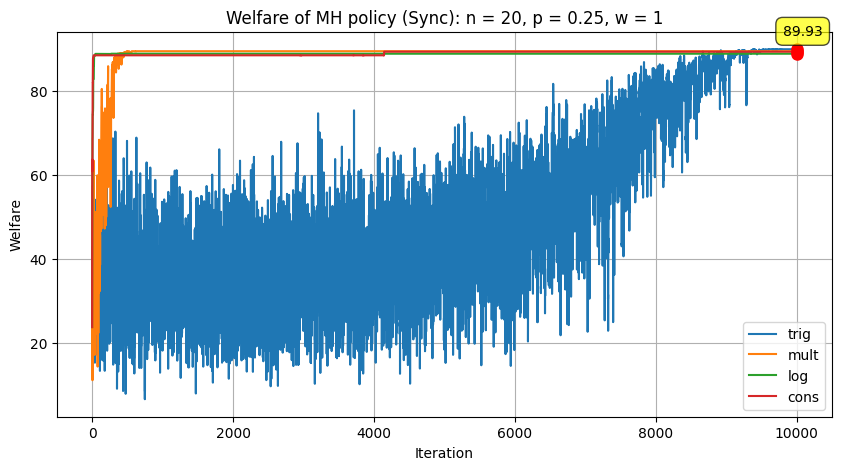

True
90.44071620976369
True
90.63450905368032
True
89.19092224788982
True
88.50973890907308


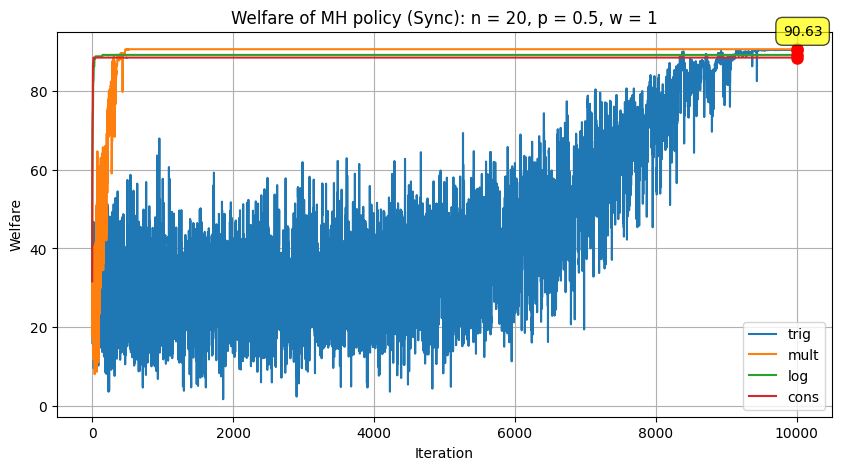

True
92.45091535604301
True
93.00663873343505
True
90.75688837302945
True
90.45084806054176


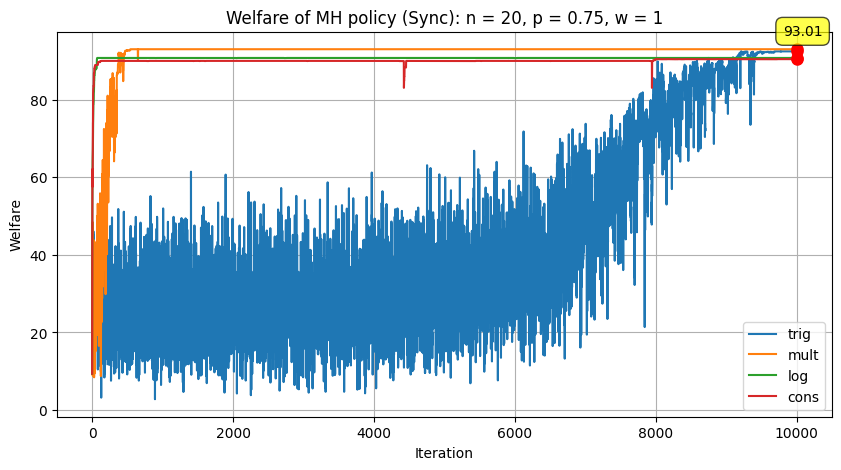

In [83]:
for mynetwork in mynetwork_list:
    n_color = mynetwork.n_color()
    mycolor = range(n_color)
    utility = utility_generator(mynetwork, n_color, seed = 41)
    # print(utility)
    weight = weight_generator(mynetwork.G.nodes(), seed = 41)
    # print(weight)
    c_WO2 = [0] * 4
    welfare_record = [0] * 4
    optimal_welfare = []
    optimal_coloring = []
    
    for i in range(4):
        c_WO2[i], welfare_record[i] = MH_policy_sync(mynetwork, mycolor, weight, utility, T = 10000, temp_type = i, omega = 1)
        # print(c_WO2[i])
        print(isproper(mynetwork, c_WO2[i]))
        print(welfare_record[i][-1])
        optimal_welfare.append(welfare_record[i][-1])
        optimal_coloring.append(c_WO2[i])
    
    file_path_oc = f'/Users/zeyichen/Desktop/URECA Yr2/new/mypaper/figures/WO_Sync_degree/WO_sync_degree_{mynetwork.prob}.txt'
    with open(file_path_oc, 'w') as file:
        for sublist in optimal_coloring:
            sublist_str = '\t'.join(str(item) for item in sublist)
            file.write(sublist_str + '\n')
    
    file_path_ow = f'/Users/zeyichen/Desktop/URECA Yr2/new/mypaper/figures/WO_Sync_degree/WO_sync_degree_{mynetwork.prob}.txt'
    with open(file_path_ow, 'w') as file:
        for item in optimal_welfare:
            file.write(str(item) + '\n')

    save_folder = "/Users/zeyichen/Desktop/URECA Yr2/new/mypaper/figures/WO_Sync_degree"
    plot(welfare_record, ['trig', 'mult', 'log', 'cons'], f'Welfare of MH policy (Sync): n = 20, p = {mynetwork.prob}, w = 1', save_path=f"{save_folder}/WO_sync_w_{omega}.png")


### WO Sync: Different Network Size

In [61]:
mynetwork_list = []
network_size = [10, 20, 30, 40, 50]
for size in network_size:
    mynetwork_list.append(network(size, prob = 0.5, seed = 41))

True
83.57560301120941
True
81.8566187070177
True
82.65237724052106
True
82.65237724052106


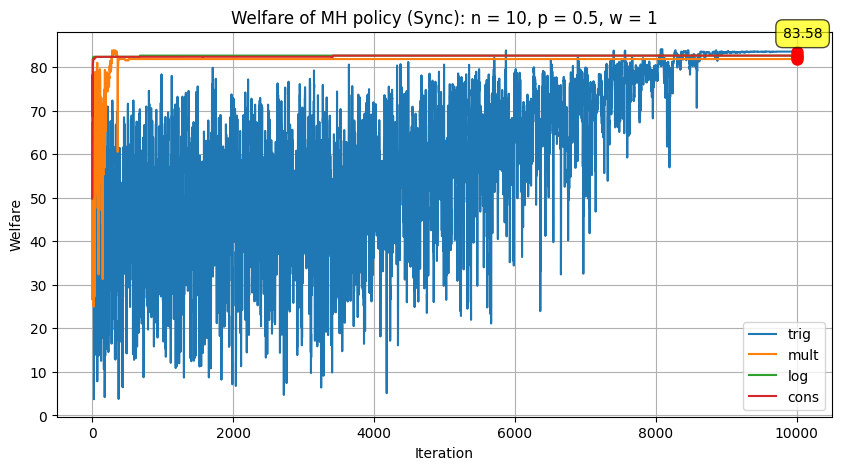

True
90.8304933276752
True
90.20639986615741
True
86.92758209504039
True
87.7013537651646


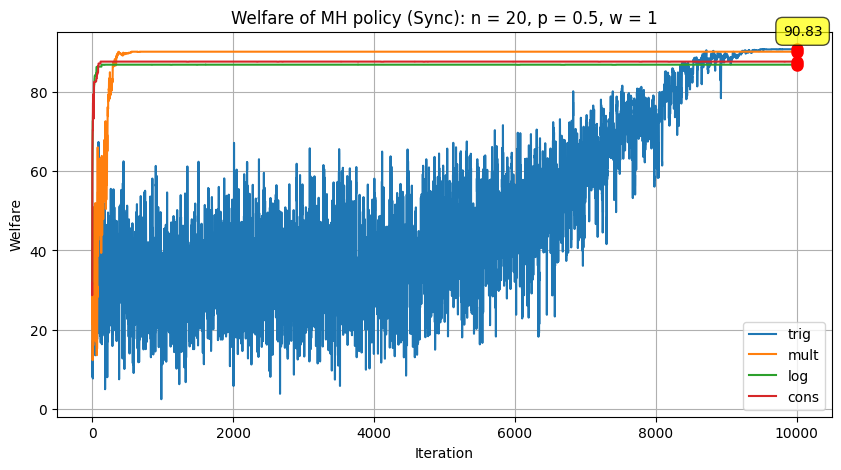

True
95.43003711764834
True
95.29557709492722
True
94.58930674193172
True
94.24214244479765


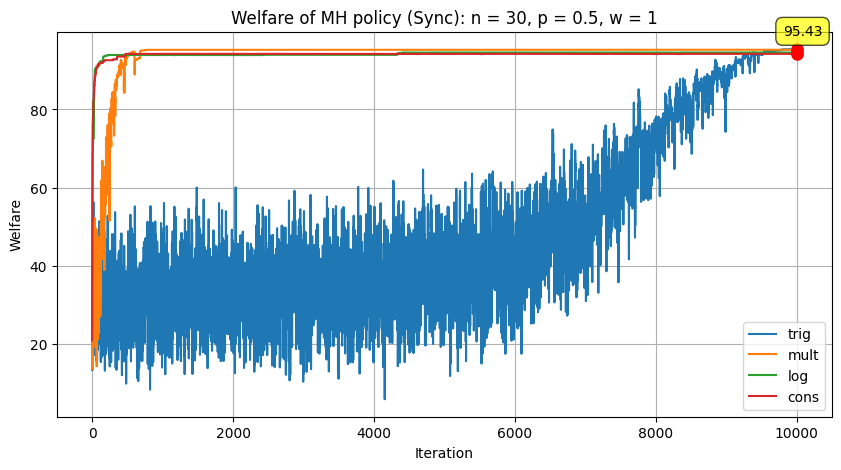

True
94.22046412335119
True
93.86964847928301
True
93.53280651865207
True
94.18652962676066


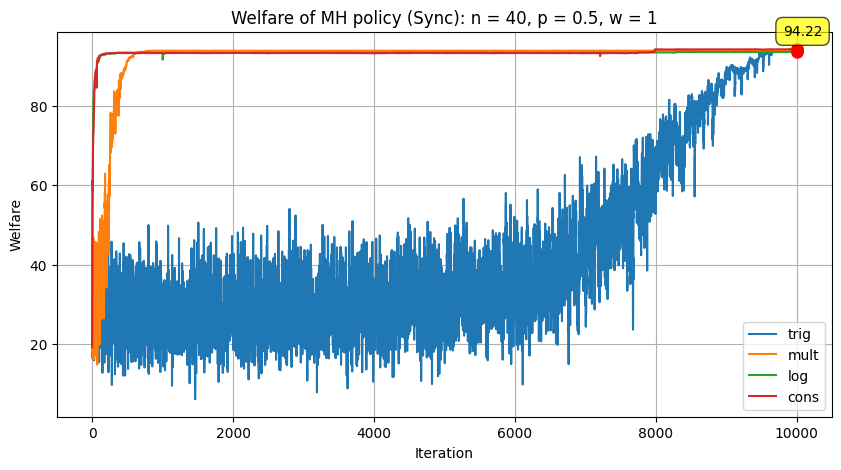

True
95.75493806888132
True
95.34674957159301
True
95.58334229632591
True
95.59992494793347


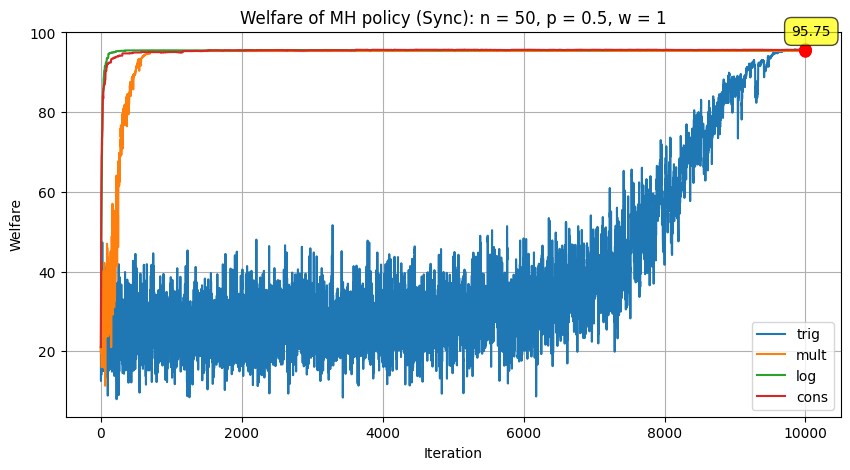

In [62]:
for mynetwork in mynetwork_list:
    n_color = mynetwork.n_color()
    mycolor = range(n_color)
    utility = utility_generator(mynetwork, n_color, seed = 41)
    # print(utility)
    weight = weight_generator(mynetwork.G.nodes(), seed = 41)
    # print(weight)
    c_WO2 = [0] * 4
    welfare_record = [0] * 4
    optimal_welfare = []
    optimal_coloring = []
    for i in range(4):
        c_WO2[i], welfare_record[i] = MH_policy_sync(mynetwork, mycolor, weight, utility, T = 10000, temp_type = i, omega = 0.5)
        # print(c_WO2[i])
        print(isproper(mynetwork, c_WO2[i]))
        print(welfare_record[i][-1])
        optimal_welfare.append(welfare_record[i][-1])
        optimal_coloring.append(c_WO2[i])

    file_path_oc = f'/Users/zeyichen/Desktop/URECA Yr2/new/mypaper/figures/WO_Sync_size/WO_sync_oc_{mynetwork.n}.txt'
    with open(file_path_oc, 'w') as file:
        for sublist in optimal_coloring:
            sublist_str = '\t'.join(str(item) for item in sublist)
            file.write(sublist_str + '\n')

    
    file_path_ow = f'/Users/zeyichen/Desktop/URECA Yr2/new/mypaper/figures/WO_Sync_size/WO_sync_ow_{mynetwork.n}.txt'
    with open(file_path_ow, 'w') as file:
        for item in optimal_welfare:
            file.write(str(item) + '\n')

    save_folder = "/Users/zeyichen/Desktop/URECA Yr2/new/mypaper/figures/WO_Sync_size"
    plot(welfare_record, ['trig', 'mult', 'log', 'cons'], f'Welfare of MH policy (Sync): n = {mynetwork.n}, p = 0.5, w = 1', save_path=f"{save_folder}/WO_sync_{mynetwork.n}.png")


### WO SIZE: Tabu Search

In [29]:
mynetwork_list = []
network_size = [10, 20, 30, 40, 50]
for size in network_size:
    mynetwork_list.append(network(size, prob = 0.5, seed = 41))

[3, 1, 4, 2, 5, 4, 3, 6, 5, 0]
True
83.88377450346657


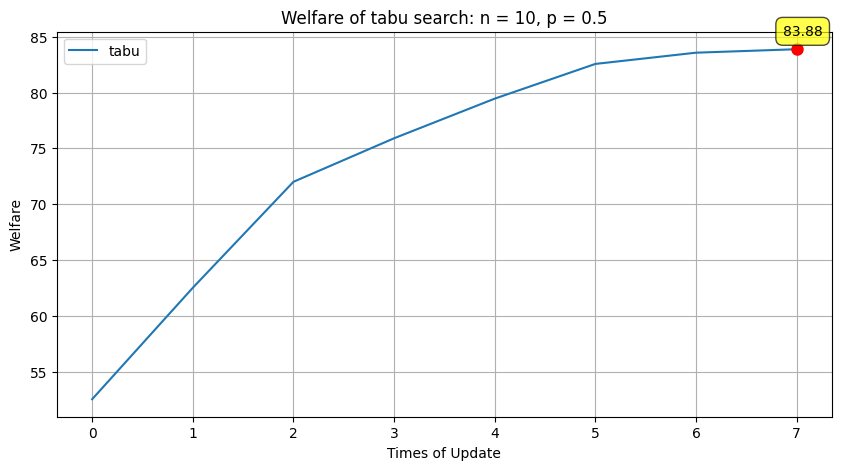

[10, 11, 0, 3, 5, 1, 1, 5, 9, 2, 8, 2, 4, 7, 4, 6, 6, 9, 8, 8]
True
88.10904230152846


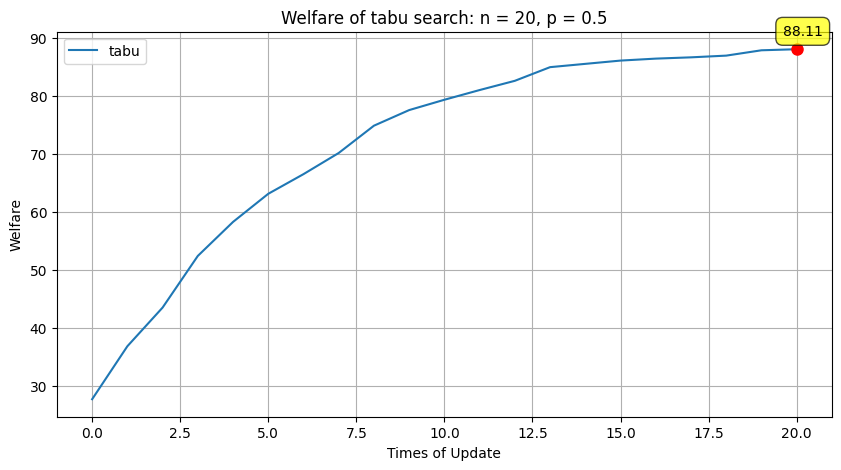

[3, 12, 13, 17, 3, 0, 2, 16, 1, 5, 3, 16, 19, 9, 7, 20, 4, 4, 14, 15, 6, 7, 10, 17, 16, 18, 6, 8, 5, 14]
True
94.28425662211494


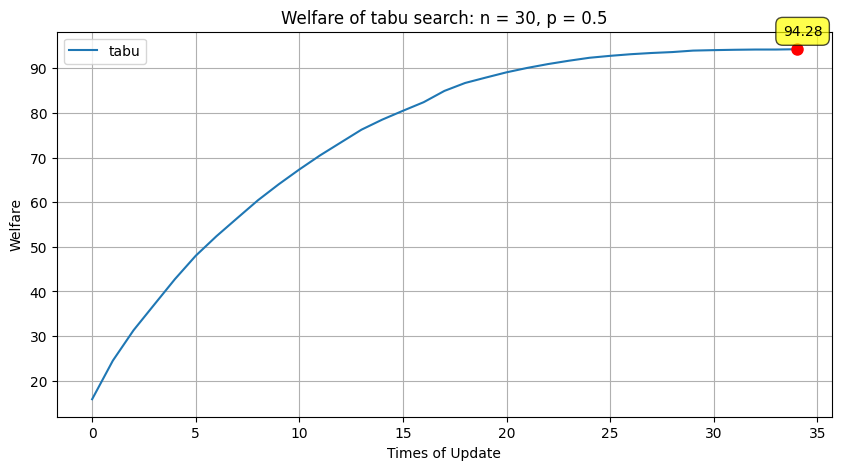

[3, 7, 15, 2, 1, 18, 7, 12, 5, 13, 8, 23, 23, 24, 22, 11, 10, 6, 10, 5, 0, 6, 21, 25, 12, 6, 0, 21, 3, 2, 5, 22, 9, 19, 21, 11, 4, 25, 20, 4]
True
93.39630253962119


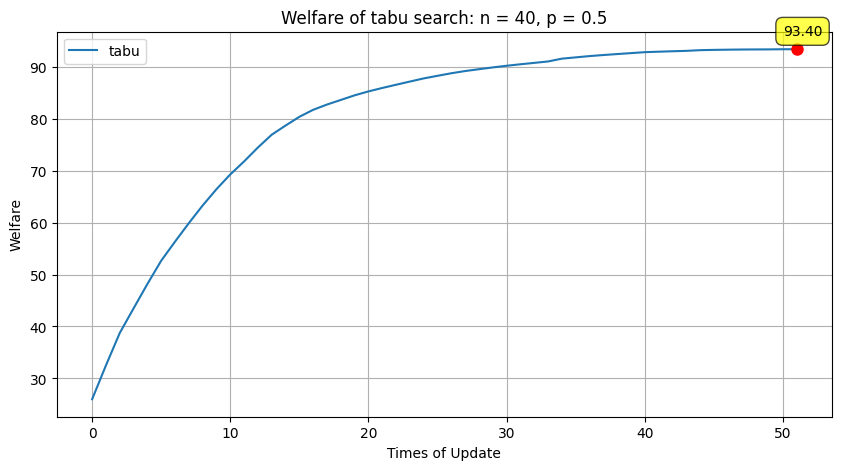

[24, 23, 16, 14, 6, 1, 21, 23, 15, 21, 20, 9, 8, 25, 0, 19, 31, 5, 18, 15, 16, 4, 9, 20, 30, 2, 8, 17, 9, 12, 26, 17, 25, 3, 25, 27, 6, 16, 24, 4, 20, 2, 3, 11, 13, 26, 22, 7, 19, 31]
True
95.52984099707754


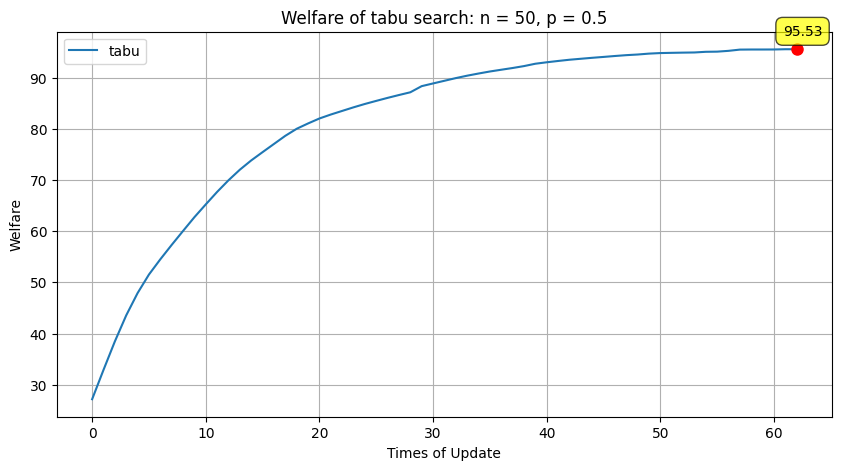

In [30]:
for mynetwork in mynetwork_list:
    n_color = mynetwork.n_color()
    mycolor = range(n_color)
    utility = utility_generator(mynetwork, n_color, seed = 41)
    # print(utility)
    weight = weight_generator(mynetwork.G.nodes(), seed = 41)
    # print(weight)

    c_tabu, welfare_record_tabu = tabu_search_WO(mynetwork, mycolor, weight, utility, T = 1000)
    print(c_tabu)
    print(isproper(mynetwork, c_tabu))
    print(welfare_record_tabu[-1])

    save_folder = "/Users/zeyichen/Desktop/URECA Yr2/new/mypaper/figures/WO_tabu_size"
    plot([welfare_record_tabu], ['tabu'], f'Welfare of tabu search: n = {mynetwork.n}, p = 0.5', 'Times of Update', save_path=f"{save_folder}/WO_tabu_{mynetwork.n}.png")


### WO Degree: Tabu Search

In [84]:
mynetwork_list = []
network_prob = [0.25, 0.5, 0.75]
for prob in network_prob:
    mynetwork_list.append(network(n = 20, prob = prob, seed = 41))

[3, 2, 4, 1, 3, 5, 2, 3, 0, 0, 5, 0, 7, 4, 8, 1, 9, 8, 7, 4]
True
88.87113524604199


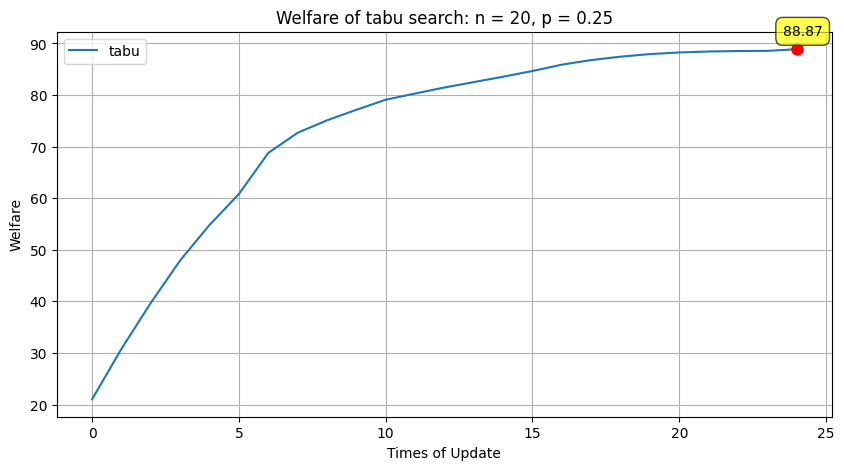

[10, 11, 0, 3, 5, 1, 1, 5, 9, 2, 8, 2, 4, 7, 4, 6, 6, 9, 8, 8]
True
88.10904230152846


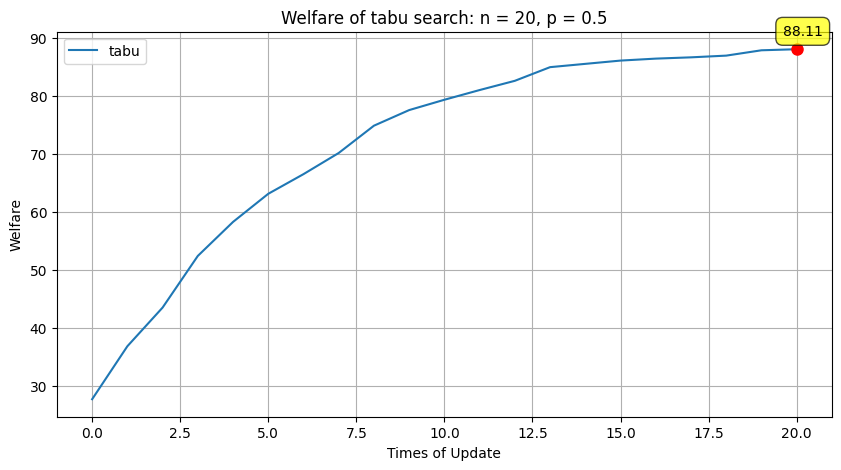

[3, 14, 13, 16, 4, 10, 13, 15, 9, 1, 18, 8, 6, 0, 11, 17, 5, 12, 12, 2]
True
91.38023244304077


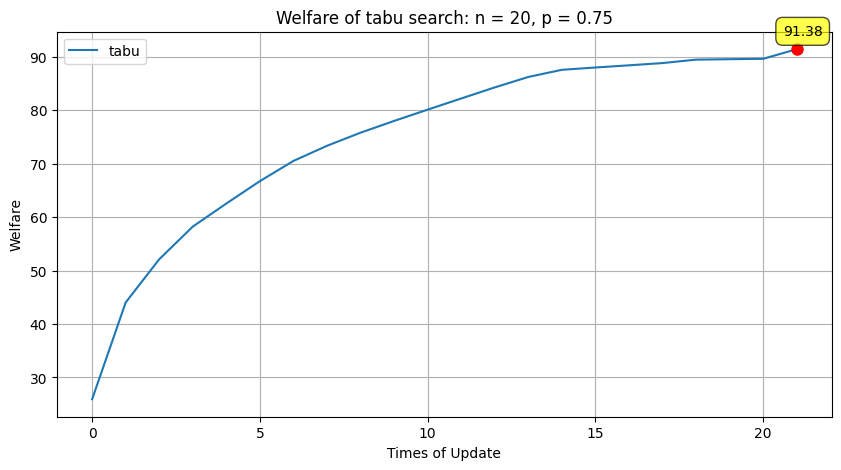

In [85]:
for mynetwork in mynetwork_list:
    n_color = mynetwork.n_color()
    mycolor = range(n_color)
    utility = utility_generator(mynetwork, n_color, seed = 41)
    # print(utility)
    weight = weight_generator(mynetwork.G.nodes(), seed = 41)
    # print(weight)

    c_tabu, welfare_record_tabu = tabu_search_WO(mynetwork, mycolor, weight, utility, T = 500)
    print(c_tabu)
    print(isproper(mynetwork, c_tabu))
    print(welfare_record_tabu[-1])

    save_folder = "/Users/zeyichen/Desktop/URECA Yr2/new/mypaper/figures/WO_tabu_degree"
    plot([welfare_record_tabu], ['tabu'], f'Welfare of tabu search: n = 20, p = {mynetwork.prob}', 'Times of Update', save_path=f"{save_folder}/WO_tabu_{mynetwork.prob}.png")

### RWO Async: Different network size

In [86]:
mynetwork_list = []
network_size = [10, 20, 30, 40, 50]
for size in network_size:
    mynetwork_list.append(network(size, prob = 0.5, seed = 41))

10 finishes


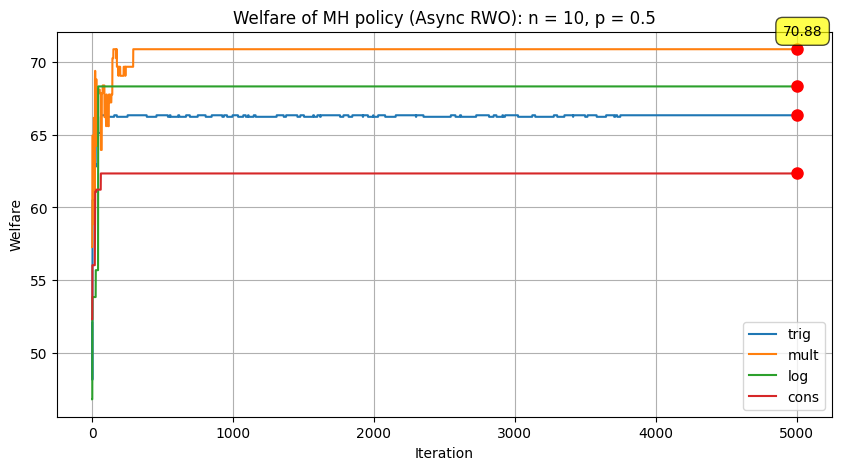

/Users/zeyichen/Desktop/URECA Yr2/Code/New code/MH_Algo.py:156: RuntimeWarning: overflow encountered in exp
  p = min(1, np.exp((delta_U - delta_L)/ temp))


20 finishes


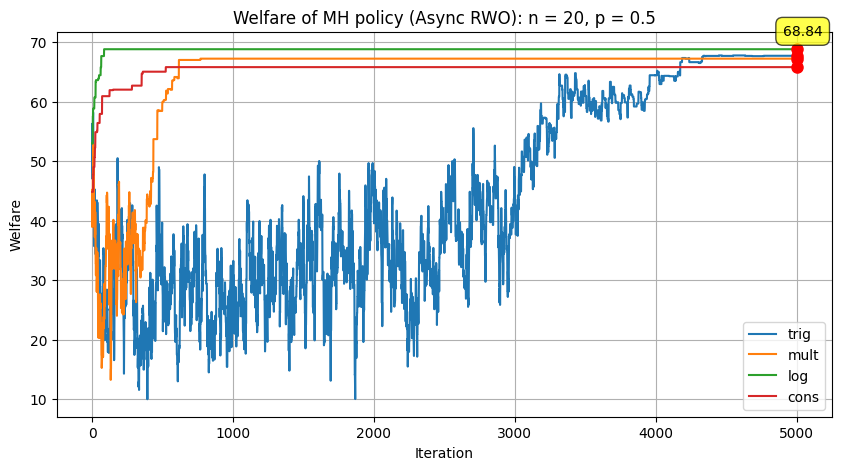

KeyboardInterrupt: 

In [37]:
for mynetwork in mynetwork_list:
    n_color = mynetwork.n_color()
    mycolor = range(n_color)
    utility = utility_generator(mynetwork, n_color, seed = 41)
    # print(utility)
    weight = weight_generator(mynetwork.G.nodes(), seed = 41)
    # print(weight)
    # c_WO2 = [0] * 4
    c_WO2 = []
    c_WO2_path = f'/Users/zeyichen/Desktop/URECA Yr2/new/mypaper/figures/WO_Async_size/WO_async_oc_{mynetwork.n}.txt'

    # Load the list of lists from the file
    with open(c_WO2_path, 'r') as file:
        for line in file:
            sublist = [int(item) for item in line.strip().split('\t')]
            c_WO2.append(sublist)

    c_RWO = [0] * 4
    welfare_record_RWO = [0] * 4
    optimal_welfare_RWO = []
    optimal_coloring_RWO = []
    for i in range(4):
        c_RWO[i], welfare_record_RWO[i] = MH_policy_async_RWO(mynetwork, c_WO2[i], mycolor, weight, utility, T = 5000, temp_type = i)
        optimal_welfare_RWO.append(welfare_record_RWO[i][-1])
        optimal_coloring_RWO.append(c_RWO[i])
    print(f"{mynetwork.n} finishes")

    file_path = f'/Users/zeyichen/Desktop/URECA Yr2/new/mypaper/figures/RWO_Async_size/RWO_async_oc_{mynetwork.n}.txt'
    with open(file_path, 'w') as file:
        for item in optimal_coloring:
            file.write(str(item) + '\n')
    
    file_path = f'/Users/zeyichen/Desktop/URECA Yr2/new/mypaper/figures/RWO_Async_size/RWO_async_ow_{mynetwork.n}.txt'
    with open(file_path, 'w') as file:
        for item in optimal_welfare_RWO:
            file.write(str(item) + '\n')

    save_folder = "/Users/zeyichen/Desktop/URECA Yr2/new/mypaper/figures/RWO_Async_size"
    plot(welfare_record_RWO, ['trig', 'mult', 'log', 'cons'], f'Welfare of MH policy (Async RWO): n = {mynetwork.n}, p = 0.5', save_path=f"{save_folder}/RWO_async_{mynetwork.n}.png")


### RWO_Async: Different Network degree

In [88]:
mynetwork_list = []
network_prob = [0.25, 0.5, 0.75]
for prob in network_prob:
    mynetwork_list.append(network(n = 20, prob = prob, seed = 41))

[[8, 2, 3, 3, 0, 5, 2, 3, 0, 1, 5, 0, 7, 4, 8, 2, 1, 3, 7, 4], [3, 2, 4, 9, 0, 5, 2, 3, 0, 1, 5, 0, 7, 4, 8, 2, 1, 3, 7, 4], [3, 2, 4, 9, 0, 5, 2, 3, 0, 1, 5, 0, 8, 4, 8, 2, 1, 8, 7, 4], [3, 6, 4, 9, 0, 3, 2, 3, 0, 1, 5, 0, 7, 4, 8, 5, 1, 2, 7, 4]]


/Users/zeyichen/Desktop/URECA Yr2/Code/New code/MH_Algo.py:156: RuntimeWarning: overflow encountered in exp
  p = min(1, np.exp((delta_U - delta_L)/ temp))


20 finishes


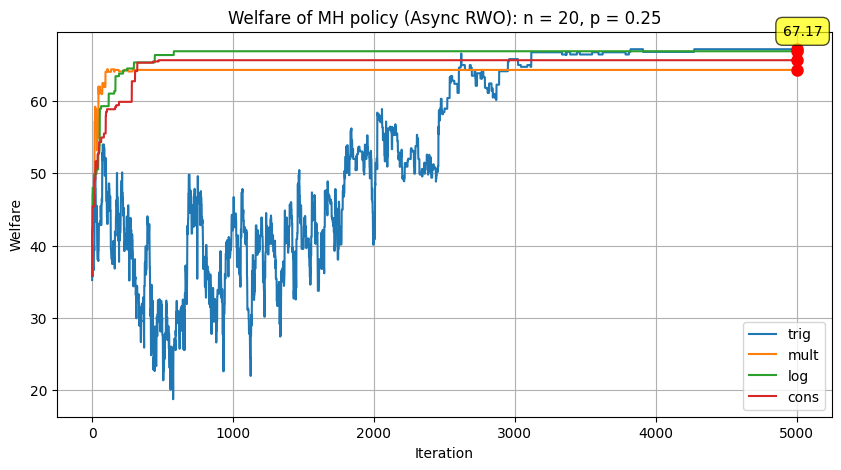

[[10, 11, 2, 3, 7, 7, 1, 1, 9, 2, 8, 2, 4, 5, 1, 0, 1, 9, 8, 6], [3, 0, 9, 4, 7, 9, 8, 1, 11, 3, 1, 6, 4, 5, 1, 7, 2, 9, 2, 6], [3, 11, 0, 4, 7, 7, 1, 3, 9, 2, 8, 1, 4, 5, 10, 1, 2, 9, 8, 6], [8, 0, 9, 3, 5, 2, 1, 1, 11, 7, 8, 2, 4, 7, 1, 5, 10, 9, 11, 6]]
20 finishes


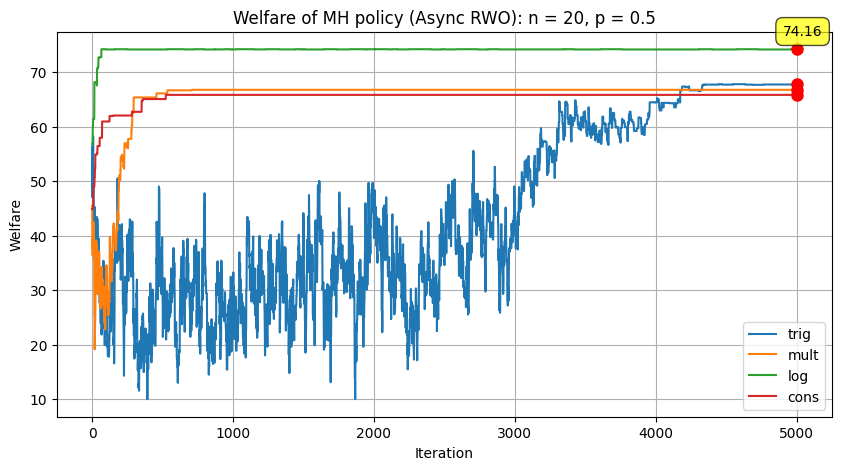

[[3, 14, 1, 10, 11, 10, 1, 15, 11, 16, 4, 3, 6, 0, 2, 17, 5, 8, 18, 12], [3, 4, 1, 10, 4, 10, 1, 15, 11, 14, 18, 9, 6, 8, 5, 16, 17, 12, 12, 0], [3, 14, 17, 16, 4, 10, 13, 15, 11, 1, 18, 9, 6, 8, 2, 9, 5, 12, 12, 0], [3, 14, 17, 10, 11, 17, 1, 15, 11, 16, 12, 4, 6, 10, 2, 9, 5, 12, 18, 0]]
20 finishes


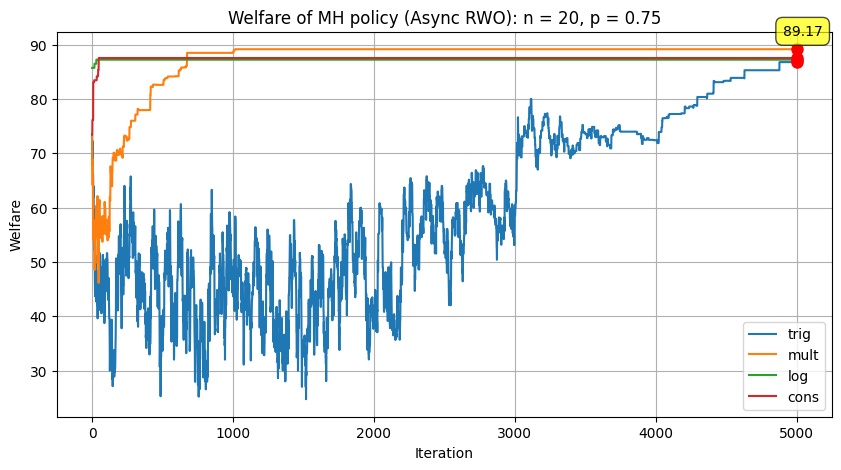

In [89]:
for mynetwork in mynetwork_list:
    n_color = mynetwork.n_color()
    mycolor = range(n_color)
    utility = utility_generator(mynetwork, n_color, seed = 41)
    # print(utility)
    weight = weight_generator(mynetwork.G.nodes(), seed = 41)
    # print(weight)
    # c_WO2 = [0] * 4
    c_WO2 = []
    c_WO2_path = f'/Users/zeyichen/Desktop/URECA Yr2/new/mypaper/figures/WO_Async_degree/WO_async_oc_{mynetwork.prob}.txt'

    # Load the list of lists from the file
    with open(c_WO2_path, 'r') as file:
        for line in file:
            sublist = [int(item) for item in line.strip().split('\t')]
            c_WO2.append(sublist)

    print(c_WO2)

    c_RWO = [0] * 4
    welfare_record_RWO = [0] * 4
    optimal_welfare_RWO = []
    optimal_coloring_RWO = []
    for i in range(4):
        c_RWO[i], welfare_record_RWO[i] = MH_policy_async_RWO(mynetwork, c_WO2[i], mycolor, weight, utility, T = 5000, temp_type = i)
        optimal_welfare_RWO.append(welfare_record_RWO[i][-1])
        optimal_coloring_RWO.append(c_RWO[i])
    print(f"{mynetwork.n} finishes")

    file_path = f'/Users/zeyichen/Desktop/URECA Yr2/new/mypaper/figures/RWO_Async_degree/RWO_async_oc_{mynetwork.prob}.txt'
    with open(file_path, 'w') as file:
        for item in optimal_coloring:
            file.write(str(item) + '\n')
    
    file_path = f'/Users/zeyichen/Desktop/URECA Yr2/new/mypaper/figures/RWO_Async_degree/RWO_async_{mynetwork.prob}.txt'
    with open(file_path, 'w') as file:
        for item in optimal_welfare_RWO:
            file.write(str(item) + '\n')

    save_folder = "/Users/zeyichen/Desktop/URECA Yr2/new/mypaper/figures/RWO_Async_degree"
    plot(welfare_record_RWO, ['trig', 'mult', 'log', 'cons'], f'Welfare of MH policy (Async RWO): n = 20, p = {mynetwork.prob}', save_path=f"{save_folder}/RWO_async_{mynetwork.prob}.png")


### RWO Sync: Different Omega

In [90]:
mynetwork = network(n = 20, prob = 0.5, seed = 41)
omega_list = [0.25, 0.5, 0.75, 1]

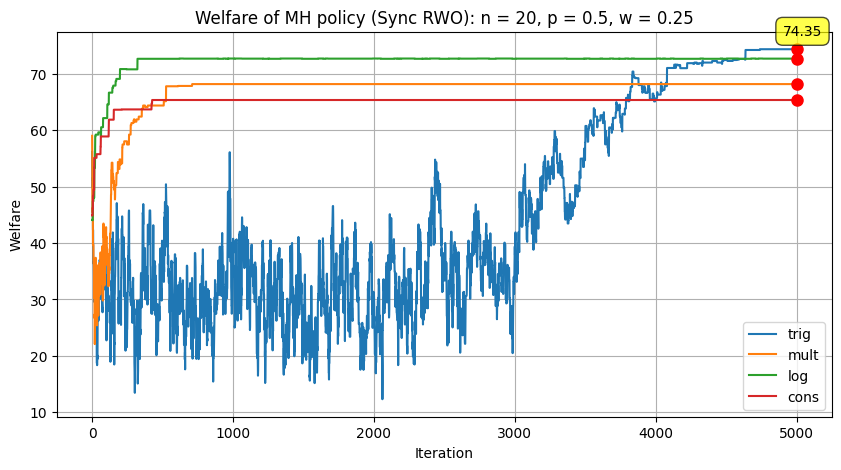

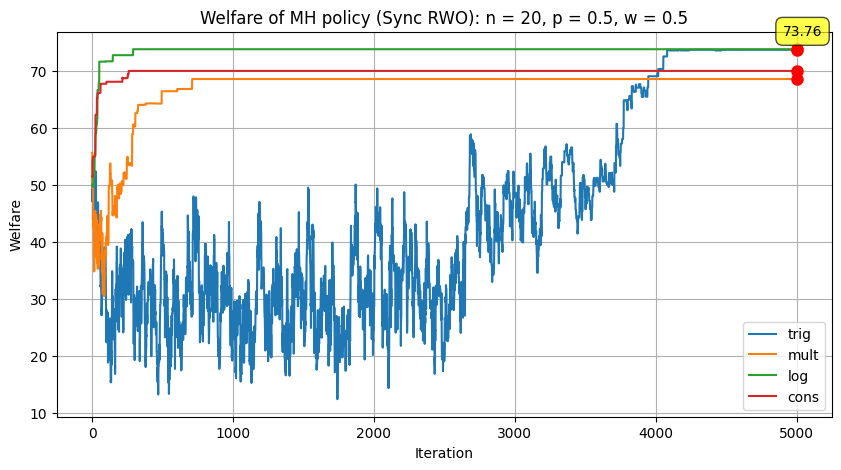

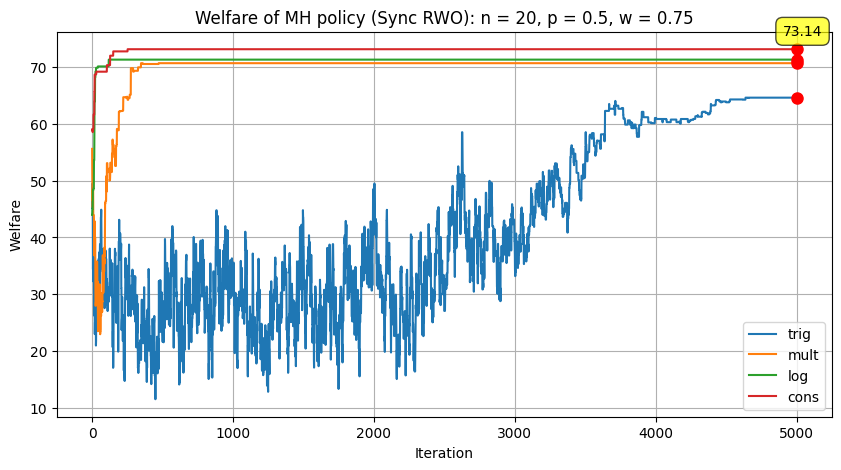

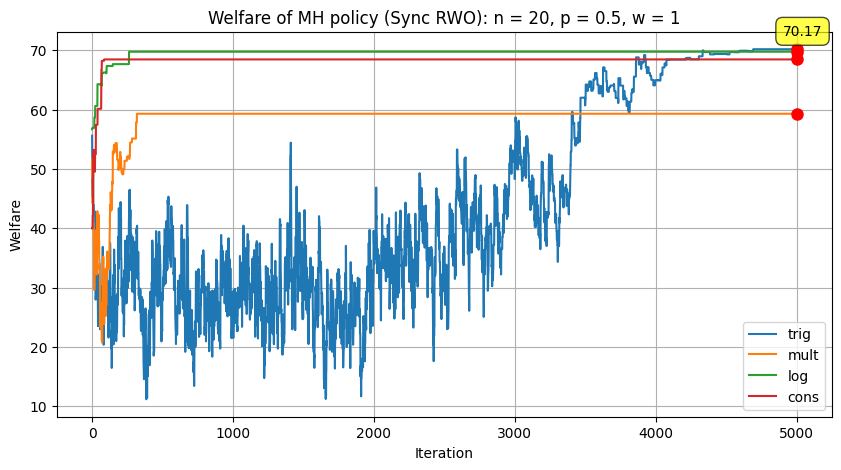

In [91]:
for omega in omega_list:
    n_color = mynetwork.n_color()
    mycolor = range(n_color)
    utility = utility_generator(mynetwork, n_color, seed = 41)
    # print(utility)
    weight = weight_generator(mynetwork.G.nodes(), seed = 41)
    # print(weight)
    c_WO2 = []
    c_WO2_path = f'/Users/zeyichen/Desktop/URECA Yr2/new/mypaper/figures/WO_Sync_omega/WO_sync_oc_{omega}.txt'

    # Load the list of lists from the file
    with open(c_WO2_path, 'r') as file:
        for line in file:
            sublist = [int(item) for item in line.strip().split('\t')]
            c_WO2.append(sublist)

    c_RWO = [0] * 4
    welfare_record_RWO = [0] * 4
    optimal_welfare_RWO = []
    optimal_coloring_RWO = []
    for i in range(4):
        c_RWO[i], welfare_record_RWO[i] = MH_policy_async_RWO(mynetwork, c_WO2[i], mycolor, weight, utility, T = 5000, temp_type = i)
        optimal_welfare_RWO.append(welfare_record_RWO[i][-1])
        optimal_coloring_RWO.append(c_RWO[i])

    file_path = f'/Users/zeyichen/Desktop/URECA Yr2/new/mypaper/figures/RWO_Sync_omega/RWO_sync_oc_{omega}.txt'
    with open(file_path, 'w') as file:
        for item in optimal_coloring:
            file.write(str(item) + '\n')
    
    file_path = f'/Users/zeyichen/Desktop/URECA Yr2/new/mypaper/figures/RWO_Sync_omega/RWO_async_{omega}.txt'
    with open(file_path, 'w') as file:
        for item in optimal_welfare_RWO:
            file.write(str(item) + '\n')

    save_folder = "/Users/zeyichen/Desktop/URECA Yr2/new/mypaper/figures/RWO_Sync_omega"
    plot(welfare_record_RWO, ['trig', 'mult', 'log', 'cons'], f'Welfare of MH policy (Sync RWO): n = 20, p = 0.5, w = {omega}', save_path=f"{save_folder}/RWO_sync_{omega}.png")


### RWO SIZE: TS

In [ ]:
mynetwork_list = []
network_size = [10, 50, 200]
for size in network_size:
    mynetwork_list.append(network(size, prob = 0.3, seed = 41))

In [ ]:
for mynetwork in mynetwork_list:
    n_color = mynetwork.n_color()
    mycolor = range(n_color)
    utility = utility_generator(mynetwork, n_color, seed = 41)
    # print(utility)
    weight = weight_generator(mynetwork.G.nodes(), seed = 41)
    # print(weight)

    c_tabu, welfare_record_tabu = tabu_search_RWO(mynetwork, mycolor, weight, utility, T = 200)
    print(c_tabu)
    print(isproper(mynetwork, c_tabu))
    print(welfare_record_tabu[-1])

    save_folder = "/Users/zeyichen/Desktop/URECA Yr2/new/mypaper/figures/RWO_tabu_size"
    plot([welfare_record_tabu], ['tabu'], f'Welfare of tabu search: n = {mynetwork.n}, p = 0.3', 'Times of Update', save_path=f"{save_folder}/RWO_tabu_{mynetwork.n}.png")


### RWO Degree: TS

In [111]:
mynetwork_list = []
network_prob = [0.25, 0.5, 0.75]
for prob in network_prob:
    mynetwork_list.append(network(n = 20, prob = prob, seed = 41))

[[8, 2, 3, 3, 0, 5, 2, 3, 0, 1, 5, 0, 7, 4, 8, 2, 1, 3, 7, 4], [3, 2, 4, 9, 0, 5, 2, 3, 0, 1, 5, 0, 7, 4, 8, 2, 1, 3, 7, 4], [3, 2, 4, 9, 0, 5, 2, 3, 0, 1, 5, 0, 8, 4, 8, 2, 1, 8, 7, 4], [3, 6, 4, 9, 0, 3, 2, 3, 0, 1, 5, 0, 7, 4, 8, 5, 1, 2, 7, 4]]
[0, 6, 4, 3, 5, 5, 2, 3, 9, 9, 5, 0, 7, 8, 8, 2, 1, 7, 6, 4]
True
70.92646293415625


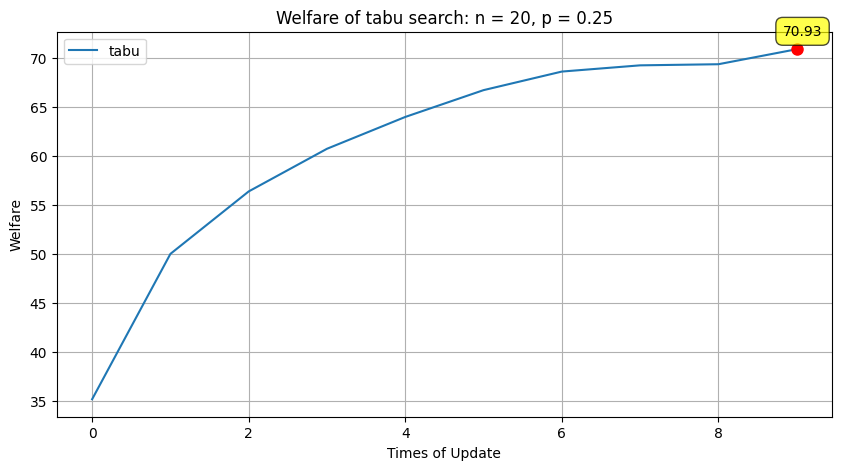

[3, 2, 0, 9, 11, 7, 8, 6, 10, 10, 5, 0, 7, 4, 1, 2, 1, 4, 11, 6]
True
56.87918325763101


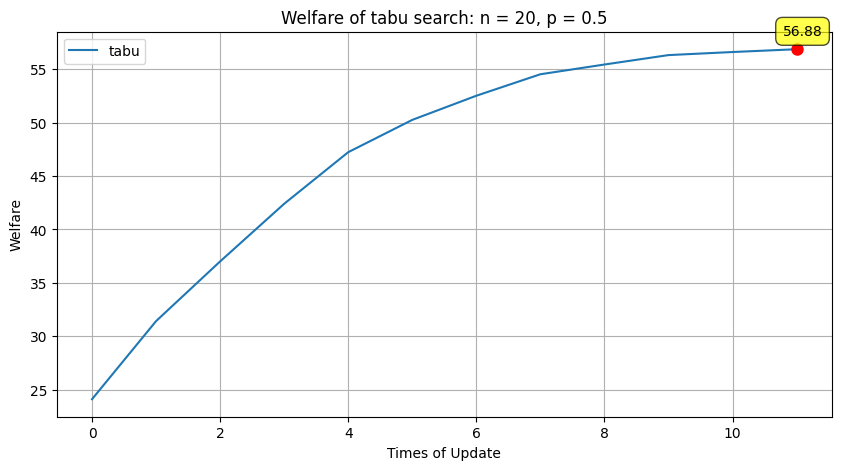

[3, 2, 14, 16, 0, 10, 13, 6, 11, 1, 5, 15, 8, 4, 7, 9, 18, 12, 12, 17]
True
82.65472970947664


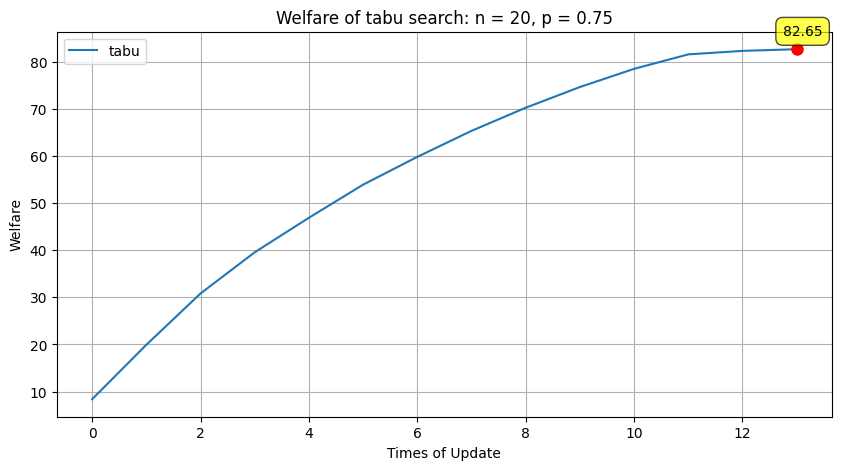

In [110]:
c = 0

c_WO2 = []
c_WO2_path = f'/Users/zeyichen/Desktop/URECA Yr2/new/mypaper/figures/WO_Async_degree/WO_async_oc_{mynetwork.prob}.txt'

# Load the list of lists from the file
with open(c_WO2_path, 'r') as file:
    for line in file:
        sublist = [int(item) for item in line.strip().split('\t')]
        c_WO2.append(sublist)
print(c_WO2)

for mynetwork in mynetwork_list:
    n_color = mynetwork.n_color()
    mycolor = range(n_color)
    utility = utility_generator(mynetwork, n_color, seed = 41)
    # print(utility)
    weight = weight_generator(mynetwork.G.nodes(), seed = 41)
    # print(weight)
    
    c_tabu, welfare_record_tabu = tabu_search_RWO(mynetwork, c_WO2[c], mycolor, weight, utility, T = 5)
    print(c_tabu)
    print(isproper(mynetwork, c_tabu))
    print(welfare_record_tabu[-1])

    c += 1

    save_folder = "/Users/zeyichen/Desktop/URECA Yr2/new/mypaper/figures/RWO_tabu_degree"
    plot([welfare_record_tabu], ['tabu'], f'Welfare of tabu search: n = 20, p = {mynetwork.prob}', 'Times of Update', save_path=f"{save_folder}/RWO_tabu_{mynetwork.prob}.png")

[3, 6, 8, 9, 3, 7, 8, 4, 10, 10, 11, 0, 7, 5, 1, 0, 1, 4, 2, 6]
True
69.92431583204899


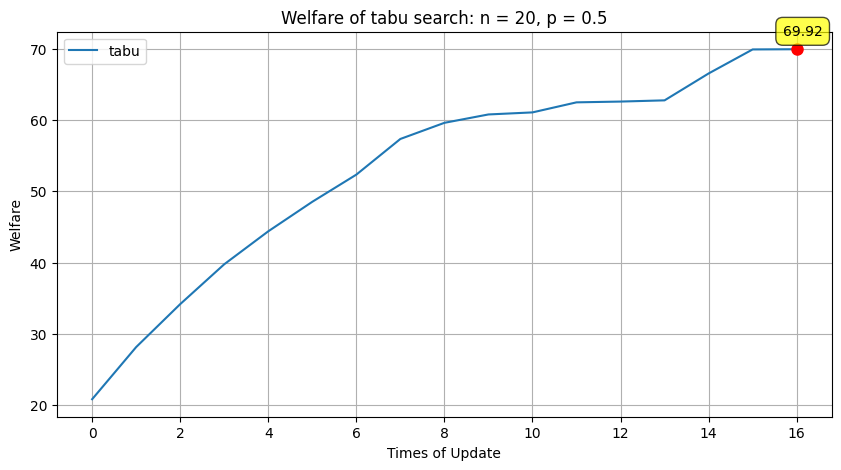

In [114]:
mynetwork = mynetwork_list[1]
n_color = mynetwork.n_color()
mycolor = range(n_color)
utility = utility_generator(mynetwork, n_color, seed = 41)
# print(utility)
weight = weight_generator(mynetwork.G.nodes(), seed = 41)
# print(weight)

c_tabu, welfare_record_tabu = tabu_search_RWO(mynetwork, c_WO2[c], mycolor, weight, utility, T = 30)
print(c_tabu)
print(isproper(mynetwork, c_tabu))
print(welfare_record_tabu[-1])

save_folder = "/Users/zeyichen/Desktop/URECA Yr2/new/mypaper/figures/RWO_tabu_degree"
plot([welfare_record_tabu], ['tabu'], f'Welfare of tabu search: n = 20, p = {mynetwork.prob}', 'Times of Update', save_path=f"{save_folder}/RWO_tabu_{mynetwork.prob}.png")

[3, 18, 7, 16, 0, 10, 13, 12, 11, 1, 6, 15, 8, 4, 5, 14, 18, 9, 2, 17]
True
81.74825785039056


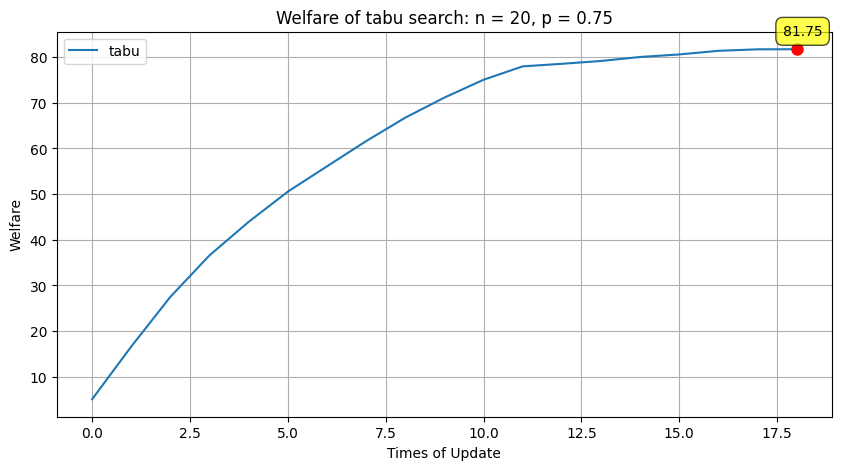

In [115]:
mynetwork = mynetwork_list[2]
n_color = mynetwork.n_color()
mycolor = range(n_color)
utility = utility_generator(mynetwork, n_color, seed = 41)
# print(utility)
weight = weight_generator(mynetwork.G.nodes(), seed = 41)
# print(weight)

c_tabu, welfare_record_tabu = tabu_search_RWO(mynetwork, c_WO2[c], mycolor, weight, utility, T = 30)
print(c_tabu)
print(isproper(mynetwork, c_tabu))
print(welfare_record_tabu[-1])

save_folder = "/Users/zeyichen/Desktop/URECA Yr2/new/mypaper/figures/RWO_tabu_degree"
plot([welfare_record_tabu], ['tabu'], f'Welfare of tabu search: n = 20, p = {mynetwork.prob}', 'Times of Update', save_path=f"{save_folder}/RWO_tabu_{mynetwork.prob}.png")

In [155]:
import os

In [165]:
def plot_summary(data, labels, name, x_values, x_label, y_label, save_path = None):
    _, ax = plt.subplots()
    for i in range(len(data) - 1):
        ax.plot(x_values, data[i], marker='o', label=labels[i])
    ax.plot(x_values, data[-1], '--k', marker = 'o', label=labels[-1])
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(name)
    ax.legend()
    ax.grid(True) 
    if save_path:
        os.makedirs(os.path.dirname(save_path), exist_ok=True)
        plt.savefig(save_path)
    plt.show()

[[84.12023598483736, 89.4537105847625, 94.4881591903312, 92.99145048250625, 93.03475845425274], [83.57560301120941, 87.18318148318295, 94.43586659410154, 93.23193321617896, 95.05476944236013], [81.426579557138, 90.77446719365999, 94.46588714239788, 93.34523562611587, 94.15641520549426], [83.88377450346657, 87.00926242356351, 94.21663164665527, 92.51560425776717, 95.65239005341546], [83.88, 88.11, 94.28, 93.4, 95.53]]


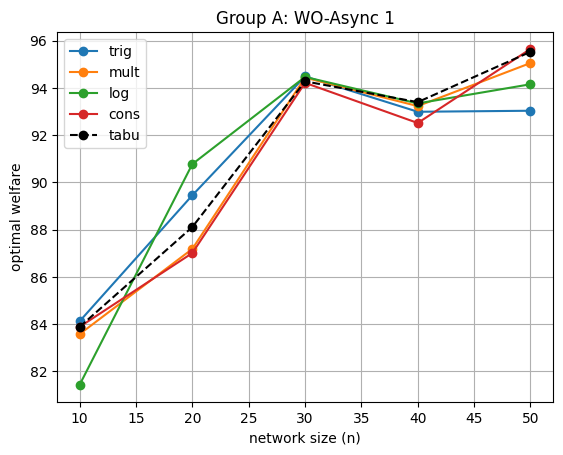

In [166]:
# Group A:
tabu = [83.88, 88.11, 94.28, 93.40, 95.53]
size = [10, 20, 30, 40, 50]
welfare = []
for n in range(len(size)):
    welfare_path = f'/Users/zeyichen/Desktop/URECA Yr2/new/mypaper/figures/WO_Async_size/WO_async_ow_{size[n]}.txt'
    # Load the list of lists from the file
    with open(welfare_path, 'r') as file:
        ow = []
        for line in file:
            ow.append(float(line.strip()))
    # print(tabu[n])
    ow.append(tabu[n]) 
    # print(ow)
    welfare.append(ow)
    # print(welfare)
welfare = np.array(welfare).T.tolist()
print(welfare)

x_start = 10
x_stop = 50
x_step = 10
x_values = np.arange(x_start, x_stop + x_step, x_step)

plot_summary(welfare, 
            ['trig', 'mult', 'log', 'cons', 'tabu'], 
            'Group A: WO-Async 1', 
            x_values= x_values,
            x_label= 'network size (n)',
            y_label= 'optimal welfare',
            save_path=f"/Users/zeyichen/Desktop/URECA Yr2/new/mypaper/figures/Group_A.png")


[[89.92905796289848, 89.4537105847625, 92.52562661605906], [89.74492654085479, 87.18318148318295, 89.90806077817777], [89.55737303971456, 90.77446719365999, 91.95423808774272], [88.71099819218702, 87.00926242356351, 90.93554021043704], [88.87, 88.11, 91.38]]


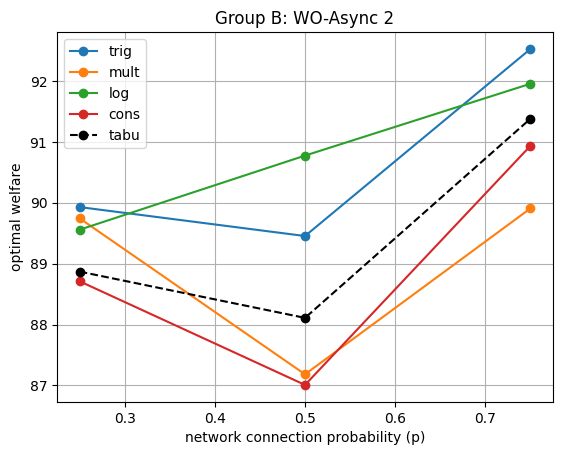

In [167]:
# Group B:
tabu = [88.87, 88.11, 91.38]
prob = [0.25, 0.5, 0.75]
welfare = []
for n in range(len(prob)):
    welfare_path = f'/Users/zeyichen/Desktop/URECA Yr2/new/mypaper/figures/WO_Async_degree/WO_async_ow_{prob[n]}.txt'
    # Load the list of lists from the file
    with open(welfare_path, 'r') as file:
        ow = []
        for line in file:
            ow.append(float(line.strip()))
    # print(tabu[n])
    ow.append(tabu[n]) 
    # print(ow)
    welfare.append(ow)
    # print(welfare)
welfare = np.array(welfare).T.tolist()
print(welfare)

x_start = 0.25
x_stop = 0.75
x_step = 0.25
x_values = np.arange(x_start, x_stop + x_step, x_step)

plot_summary(welfare, 
            ['trig', 'mult', 'log', 'cons', 'tabu'], 
            'Group B: WO-Async 2', 
            x_values= x_values,
            x_label= 'network connection probability (p)',
            y_label= 'optimal welfare',
            save_path=f"/Users/zeyichen/Desktop/URECA Yr2/new/mypaper/figures/Group_B.png")


[[90.14813113877342, 90.8304933276752, 90.61536668966754, 90.44071620976369], [88.82085290127904, 90.20639986615741, 90.44071620976369, 90.63450905368032], [87.3907048299912, 86.92758209504039, 87.14882751399868, 89.19092224788982], [85.7268063332042, 87.7013537651646, 88.82085290127904, 88.50973890907308], [88.11, 88.11, 88.11, 88.11]]
[0.25 0.5  0.75 1.  ]


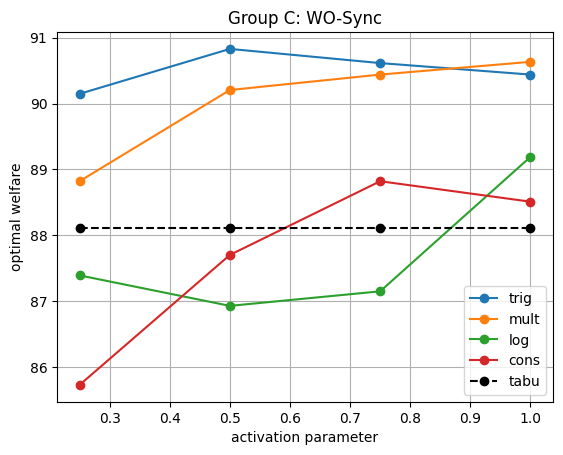

In [170]:
# Group C:
tabu = [88.11, 88.11, 88.11, 88.11]
omega = [0.25, 0.5, 0.75, 1]
welfare = []
for n in range(len(omega)):
    welfare_path = f'/Users/zeyichen/Desktop/URECA Yr2/new/mypaper/figures/WO_Sync_omega/WO_sync_ow_{omega[n]}.txt'
    # Load the list of lists from the file
    with open(welfare_path, 'r') as file:
        ow = []
        for line in file:
            ow.append(float(line.strip()))
    # print(tabu[n])
    ow.append(tabu[n]) 
    # print(ow)
    welfare.append(ow)
    # print(welfare)
welfare = np.array(welfare).T.tolist()
print(welfare)

x_start = 0.25
x_stop = 1
x_step = 0.25
x_values = np.arange(x_start, x_stop + x_step, x_step)
print(x_values)

plot_summary(welfare, 
            ['trig', 'mult', 'log', 'cons', 'tabu'], 
            'Group C: WO-Sync', 
            x_values= x_values,
            x_label= 'activation parameter',
            y_label= 'optimal welfare',
            save_path=f"/Users/zeyichen/Desktop/URECA Yr2/new/mypaper/figures/Group_C.png")


[[67.1713976087229, 67.73192231054745, 86.79605647433081], [64.30535511355534, 66.75930546826046, 89.16824097096335], [66.89150049349112, 74.16413169030089, 87.24577197603004], [65.65125202010313, 65.82549056623488, 87.5479328140376], [70.93, 69.92, 82.65]]


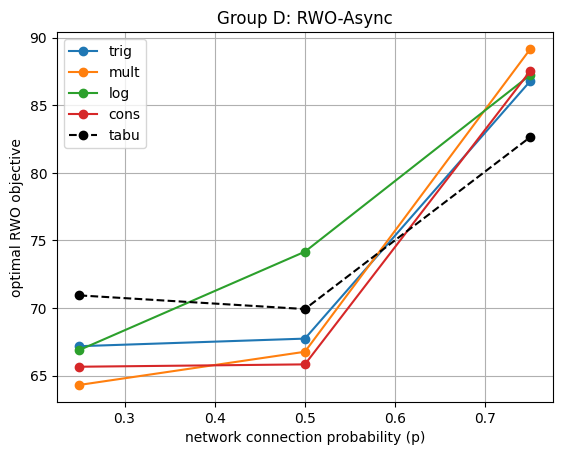

In [171]:
# Group D
tabu = [70.93, 69.92, 82.65]
prob = [0.25, 0.5, 0.75]
welfare = []
for n in range(len(prob)):
    welfare_path = f'/Users/zeyichen/Desktop/URECA Yr2/new/mypaper/figures/RWO_Async_degree/RWO_async_{prob[n]}.txt'
    # Load the list of lists from the file
    with open(welfare_path, 'r') as file:
        ow = []
        for line in file:
            ow.append(float(line.strip()))
    # print(tabu[n])
    ow.append(tabu[n]) 
    # print(ow)
    welfare.append(ow)
    # print(welfare)
welfare = np.array(welfare).T.tolist()
print(welfare)

x_start = 0.25
x_stop = 0.75
x_step = 0.25
x_values = np.arange(x_start, x_stop + x_step, x_step)

plot_summary(welfare, 
            ['trig', 'mult', 'log', 'cons', 'tabu'], 
            'Group D: RWO-Async', 
            x_values= x_values,
            x_label= 'network connection probability (p)',
            y_label= 'optimal RWO objective',
            save_path=f"/Users/zeyichen/Desktop/URECA Yr2/new/mypaper/figures/Group_D.png")


[[74.35234222737361, 73.65593838878091, 64.61584413497748, 70.17135173622717], [68.17361207082575, 68.52943177719207, 70.68560351962901, 59.295321494083744], [72.704249714721, 73.75695724833872, 71.31173729242633, 69.74942416797577], [65.35235488269777, 69.95089834756682, 73.14364570789394, 68.45244720163168], [69.92, 69.92, 69.92, 69.92]]
[0.25 0.5  0.75 1.  ]


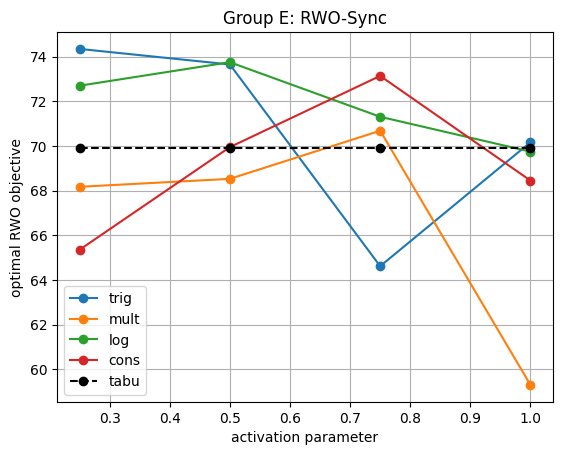

In [173]:
# Group E:
tabu = [69.92, 69.92,69.92,69.92]
omega = [0.25, 0.5, 0.75, 1]
welfare = []
for n in range(len(omega)):
    welfare_path = f'/Users/zeyichen/Desktop/URECA Yr2/new/mypaper/figures/RWO_Sync_omega/RWO_async_{omega[n]}.txt'
    # Load the list of lists from the file
    with open(welfare_path, 'r') as file:
        ow = []
        for line in file:
            ow.append(float(line.strip()))
    # print(tabu[n])
    ow.append(tabu[n]) 
    # print(ow)
    welfare.append(ow)
    # print(welfare)
welfare = np.array(welfare).T.tolist()
print(welfare)

x_start = 0.25
x_stop = 1
x_step = 0.25
x_values = np.arange(x_start, x_stop + x_step, x_step)
print(x_values)

plot_summary(welfare, 
            ['trig', 'mult', 'log', 'cons', 'tabu'], 
            'Group E: RWO-Sync', 
            x_values= x_values,
            x_label= 'activation parameter',
            y_label= 'optimal RWO objective',
            save_path=f"/Users/zeyichen/Desktop/URECA Yr2/new/mypaper/figures/Group_E.png")
